# Import Libraries and Dataframe

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create path
path = "/Users/charlottelin/Documents/06-2025 Instacart Basket Analysis"

In [4]:
# Importing latest combined customers dataframe
df_ords = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_ords_2.pkl'))

In [6]:
# Check output
df_ords.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,num_dependents,marital_status,income,merging_status,region,activity_customer_level,age_group,Income_bracket,parent_status,department_name
0,3411074,125899,1,2,20,NaN,27283,3,0,both,...,3,married,32609,both,South,High-activity Customer,Young adult,Low Income Customer,Parent,beverages
1,582767,131225,6,4,8,28.0,3896,3,1,both,...,3,living with parents and siblings,50072,both,West,High-activity Customer,Young adult,Low Income Customer,Parent,bakery
2,1648217,129928,31,1,20,10.0,37029,47,1,both,...,0,divorced/widowed,36163,both,South,High-activity Customer,Older adult,Low Income Customer,Single,dairy eggs
3,492489,93812,17,0,12,8.0,18234,22,1,both,...,0,single,163081,both,West,High-activity Customer,Older adult,High Income Customer,Single,produce
4,277503,67925,2,0,13,2.0,41950,3,0,both,...,2,married,41667,both,South,High-activity Customer,Young adult,Low Income Customer,Parent,produce


# Busiest Days and Hours

In [7]:
# Define function
day_of_week = []
for value in df_ords['orders_day_of_week']:
    if value == 0:
        day_of_week.append('Saturday')
    elif value == 1:
        day_of_week.append('Sunday')
    elif value == 2:
        day_of_week.append('Monday')
    elif value == 3:
        day_of_week.append('Tuesday')
    elif value == 4:
        day_of_week.append('Wednesday')
    elif value == 5:
        day_of_week.append('Thursday')
    elif value == 6:
        day_of_week.append('Friday')

df_ords['day_of_week'] = day_of_week

In [8]:
df_ords['day_of_week'].value_counts(dropna= False)

day_of_week
Saturday     1912579
Sunday       1745766
Friday       1389072
Monday       1300765
Thursday     1297877
Tuesday      1185927
Wednesday    1168014
Name: count, dtype: int64

Text(0, 0.5, 'Order Counts')

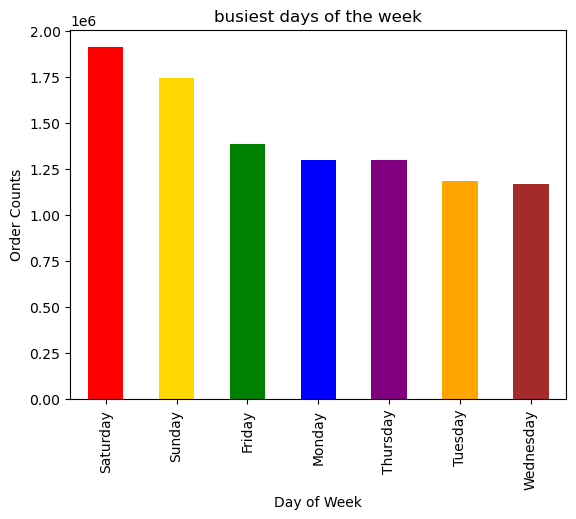

In [9]:
# Plot busiest days of the week bar graph
bar = df_ords['day_of_week'].value_counts().plot.bar(color = ['red', 'gold', 'green', 'blue', 'purple', 'orange', 'brown'])

# Add title and labels
plt.title('busiest days of the week')
plt.xlabel('Day of Week')
plt.ylabel('Order Counts')

In [10]:
# Export
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Busiest Day of Week.png'), bbox_inches='tight')

### Observations
The busiest days are Saturday and Sunday.

In [11]:
# Define function for busiest hours
def get_busiest_hours(order_counts_dict, top_n=5):
    sorted_hours = sorted(order_counts_dict.items(), key=lambda x: x[1], reverse=True)
    return sorted_hours[:top_n]

In [12]:
order_counts = {
    10: 2764390, 11: 2738585, 14: 2691563, 15: 2664522, 13: 2663272,
    12: 2620800, 16: 2537469, 9: 2456661, 17: 2089452, 8: 1719952,
    18: 1637922, 19: 1259382, 20: 977017, 7: 891928, 21: 796362,
    22: 634737, 23: 402612, 6: 290770, 0: 218942, 1: 115786,
    5: 88057, 2: 69431, 4: 53283, 3: 51317
}

In [13]:
top_hours = get_busiest_hours(order_counts, top_n=5)

In [14]:
print("Top 5 busiest order hours:")
for hour, count in top_hours:
    print(f"{hour}:00 - {count} orders")

Top 5 busiest order hours:
10:00 - 2764390 orders
11:00 - 2738585 orders
14:00 - 2691563 orders
15:00 - 2664522 orders
13:00 - 2663272 orders


Text(0, 0.5, 'Order Counts')

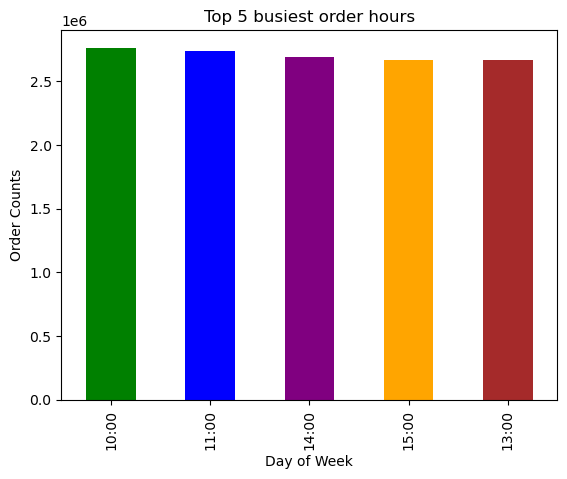

In [15]:
# Plot bar graph
top_hours_series = pd.Series(
    data=[count for hour, count in top_hours],
    index=[f"{hour}:00" for hour, count in top_hours]
)

# Plot
colors = ['green', 'blue', 'purple', 'orange', 'brown']
bar2 = top_hours_series.plot.bar(color=colors)

# Add title and labels
plt.title('Top 5 busiest order hours')
plt.xlabel('Day of Week')
plt.ylabel('Order Counts')

In [16]:
# Export
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Busiest Hours of Day.png'), bbox_inches='tight')

### Observations:
The busiest hours are 10 am, 11 am, 2 pm, 3 pm, and 1 pm.

# Price Range and Popularity

In [18]:
# Define price range
def price_label(row):

  if row['prices'] <= 5:
    return 'Low-range product'
  elif (row['prices'] > 5) and (row['prices'] <= 15):
    return 'Mid-range product'
  elif row['prices'] > 15:
    return 'High range'
  else: return 'Not enough data'

In [19]:
# Define function
df_ords_2 = df_ords[df_ords['department_id'] == 4].copy() 

In [20]:
# Apply price_label function to rows
df_ords_2['price_range'] = df_ords_2.apply(price_label, axis=1)

In [21]:
# Check results
df_ords_2['price_range'].value_counts(dropna = False)

price_range
Mid-range product    2092797
Low-range product     833329
Name: count, dtype: int64

Text(0.5, 1.0, 'price_range')

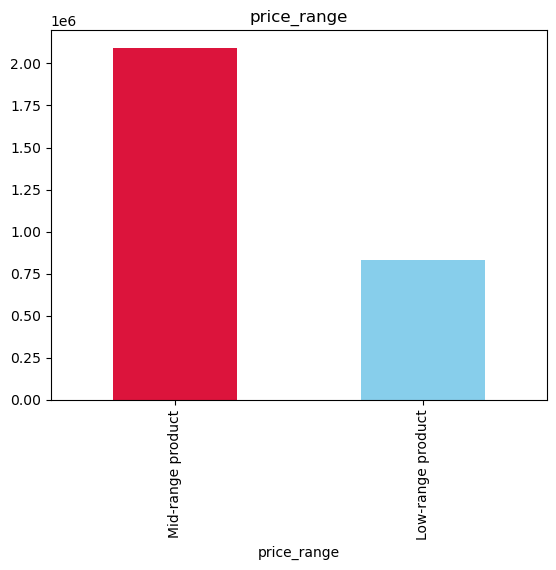

In [22]:
# Plot price range bar graph
bar3 = df_ords_2['price_range'].value_counts().plot.bar(color = (['crimson', 'skyblue', 'chocolate']))

# Add title and labels
plt.title('price_range')

### Observations:
Mid-range products are significantly more popular than low-range products. This shows that customers prefer mid-priced items or that Instacart's pricing strategy favors mid-range offers.

In [23]:
# Export
bar3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Price Range Popularity.png'), bbox_inches='tight')

# Export Final Pickle

In [24]:
df_ords_2.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_ords_2.pkl'))